# Group Number : 20
Members: 



In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
url = 'https://raw.githubusercontent.com/netariel/Olympic-Games-Data/main/dataset_olympics.csv'
first_olymp_df= pd.read_csv(url)
first_olymp_df.shape

(70000, 15)

Our data consists of 15 columns and 70,000 rows

In [3]:
additional_data_df = pd.read_csv('https://raw.githubusercontent.com/netariel/Olympic-Games-Data/main/noc_region.csv')
change_olp_df = pd.merge(first_olymp_df, additional_data_df[['noc_region','reg']], left_on='NOC', right_on='noc_region', how='left')
change_olp_df.shape

(70000, 17)

In [4]:
olympic_df = change_olp_df.drop(columns=['noc_region'])
olympic_df.shape

(70000, 16)

In [5]:
olympic_df

ID                            Name Sex   Age  Height  Weight  \
0          1                       A Dijiang   M  24.0   180.0    80.0   
1          2                        A Lamusi   M  23.0   170.0    60.0   
2          3             Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3          4            Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4          5        Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...      ...                             ...  ..   ...     ...     ...   
69995  35656              Stuart Fitzsimmons   M  19.0     NaN     NaN   
69996  35656              Stuart Fitzsimmons   M  19.0     NaN     NaN   
69997  35657  David Thomas "Dave" Fitzsimons   M  26.0   170.0    65.0   
69998  35657  David Thomas "Dave" Fitzsimons   M  30.0   170.0    65.0   
69999  35658                    Marek Fiurek   M  23.0   180.0    68.0   

                 Team  NOC        Games  Year  Season       City  \
0               China  CHN  1992 Summer  1992  Summer  Barcelona   
1               China  CHN  2012 Summer  2012  Summer     London   
2             Denmark  DEN  1920 Summer  1920  Summer  Antwerpen   
3      Denmark/Sweden  DEN  1900 Summer  1900  Summer      Paris   
4         Netherlands  NED  1988 Winter  1988  Winter    Calgary   
...               ...  ...          ...   ...     ...        ...   
69995   Great Britain  GBR  1976 Winter  1976  Winter  Innsbruck   
69996   Great Britain  GBR  1976 Winter  1976  Winter  Innsbruck   
69997       Australia  AUS  1976 Summer  1976  Summer   Montreal   
69998       Australia  AUS  1980 Summer  1980  Summer     Moskva   
69999  Czech Republic  CZE  1998 Winter  1998  Winter     Nagano   

                 Sport                             Event Medal             reg  
0           Basketball       Basketball Men's Basketball   NaN           China  
1                 Judo      Judo Men's Extra-Lightweight   NaN           China  
2             Football           Football Men's Football   NaN         Denmark  
3           Tug-Of-War       Tug-Of-War Men's Tug-Of-War  Gold         Denmark  
4        Speed Skating  Speed Skating Women's 500 metres   NaN     Netherlands  
...                ...                               ...   ...             ...  
69995    Alpine Skiing  Alpine Skiing Men's Giant Slalom   NaN              UK  
69996    Alpine Skiing        Alpine Skiing Men's Slalom   NaN              UK  
69997        Athletics     Athletics Men's 10,000 metres   NaN       Australia  
69998        Athletics      Athletics Men's 5,000 metres   NaN       Australia  
69999  Nordic Combined        Nordic Combined Men's Team   NaN  Czech Republic  

[70000 rows x 16 columns]

In [6]:
olympic_df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
reg        object
dtype: object

בשביל לדעת איך לעבוד עם הנתונים רצינו לדעת את סוג האובייקט בכל עמודה

In [7]:
num_of_team = len(olympic_df['Team'].unique())
num_of_NOC = len(olympic_df['NOC'].unique())
print(f"num of Team:{num_of_team}\nnum of NOC:{num_of_NOC}")

num of Team:827
num of NOC:226


ראינו שיש אי התאמה בין מספר המדינות לבין מספר סמלי המדינה.
בדקנו את שמות המדינות וראינו שיש מדינות שקרויות פעמים עם שינוי בתו, אך מדובר על אותה מדינה ולכן החלטנו שבמידה ונרצה להתייחס לנתון המדינה/קבוצה נשתמש בעמודת הסמל

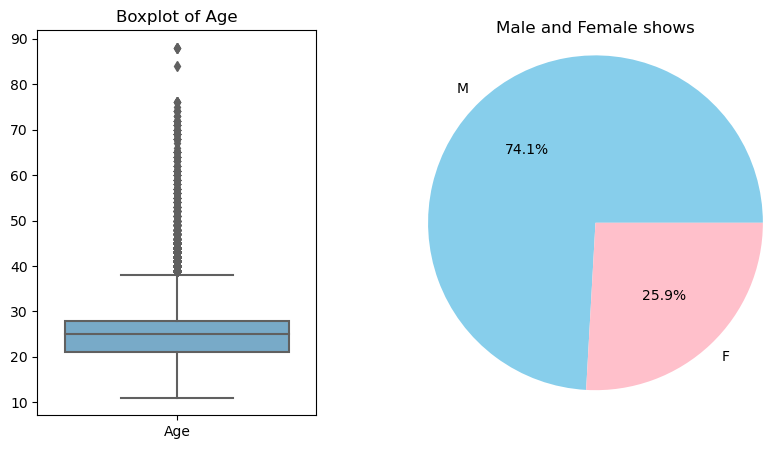

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(9, 5))
sns.boxplot(data=olympic_df[['Age']], ax=ax[0],palette='Blues')
ax[0].set_title('Boxplot of Age')
sns.set_palette("pastel")
sex_counts = olympic_df['Sex'].value_counts()
ax[1].pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['skyblue', 'pink'], radius=1.5)
ax[1].set_title('Male and Female shows', y=1.15)
plt.subplots_adjust(wspace=0.5)
plt.show()

In [9]:
age_m_df = olympic_df[olympic_df['Sex'] == 'M']
# age_m_df =age_m_df.groupby('Age')[['Medal']].count() 
# age_m_df= age_m_df.reset_index()
age_m_df
# age_m_df = age_m_df.replace(0,True)
# plt.figure(figsize=(4,3))  # גודל התרשים
# sns.histplot(x='Medal', data=age_m_df, hue='Medal')

ID                            Name Sex   Age  Height  Weight  \
0          1                       A Dijiang   M  24.0   180.0    80.0   
1          2                        A Lamusi   M  23.0   170.0    60.0   
2          3             Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3          4            Edgar Lindenau Aabye   M  34.0     NaN     NaN   
10         6                 Per Knut Aaland   M  31.0   188.0    75.0   
...      ...                             ...  ..   ...     ...     ...   
69995  35656              Stuart Fitzsimmons   M  19.0     NaN     NaN   
69996  35656              Stuart Fitzsimmons   M  19.0     NaN     NaN   
69997  35657  David Thomas "Dave" Fitzsimons   M  26.0   170.0    65.0   
69998  35657  David Thomas "Dave" Fitzsimons   M  30.0   170.0    65.0   
69999  35658                    Marek Fiurek   M  23.0   180.0    68.0   

                 Team  NOC        Games  Year  Season         City  \
0               China  CHN  1992 Summer  1992  Summer    Barcelona   
1               China  CHN  2012 Summer  2012  Summer       London   
2             Denmark  DEN  1920 Summer  1920  Summer    Antwerpen   
3      Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris   
10      United States  USA  1992 Winter  1992  Winter  Albertville   
...               ...  ...          ...   ...     ...          ...   
69995   Great Britain  GBR  1976 Winter  1976  Winter    Innsbruck   
69996   Great Britain  GBR  1976 Winter  1976  Winter    Innsbruck   
69997       Australia  AUS  1976 Summer  1976  Summer     Montreal   
69998       Australia  AUS  1980 Summer  1980  Summer       Moskva   
69999  Czech Republic  CZE  1998 Winter  1998  Winter       Nagano   

                      Sport                                     Event Medal  \
0                Basketball               Basketball Men's Basketball   NaN   
1                      Judo              Judo Men's Extra-Lightweight   NaN   
2                  Football                   Football Men's Football   NaN   
3                Tug-Of-War               Tug-Of-War Men's Tug-Of-War  Gold   
10     Cross Country Skiing  Cross Country Skiing Men's 10 kilometres   NaN   
...                     ...                                       ...   ...   
69995         Alpine Skiing          Alpine Skiing Men's Giant Slalom   NaN   
69996         Alpine Skiing                Alpine Skiing Men's Slalom   NaN   
69997             Athletics             Athletics Men's 10,000 metres   NaN   
69998             Athletics              Athletics Men's 5,000 metres   NaN   
69999       Nordic Combined                Nordic Combined Men's Team   NaN   

                  reg  
0               China  
1               China  
2             Denmark  
3             Denmark  
10                USA  
...               ...  
69995              UK  
69996              UK  
69997       Australia  
69998       Australia  
69999  Czech Republic  

[51877 rows x 16 columns]

רצינו לראות את ההתפלגות הגילאים והמינים של השחקנים שהשתתפו באולימפיאדה

In [10]:
summer_olympics_df = olympic_df[olympic_df['Season'] == 'Summer']
winter_olympics_df = olympic_df[olympic_df['Season'] == 'Winter']

In [11]:
summer_top_med_df = summer_olympics_df.groupby('NOC')[['Medal']].count() 
summer_top_med_df= summer_top_med_df.reset_index()
summer_top_med_df = summer_top_med_df.nlargest(10, 'Medal')
winter_top_med_df = winter_olympics_df.groupby('NOC')[['Medal']].count() 
winter_top_med_df= winter_top_med_df.reset_index()
winter_top_med_df = winter_top_med_df.nlargest(10, 'Medal')

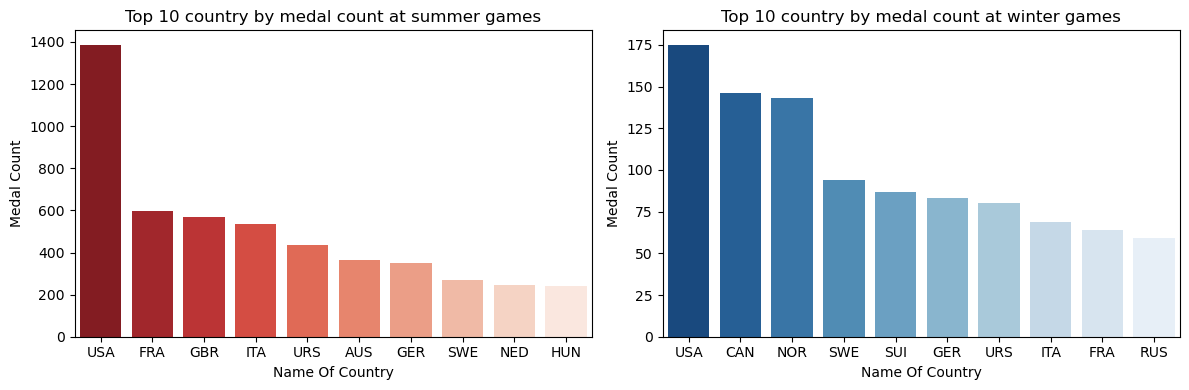

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.barplot(data=summer_top_med_df, x='NOC', y='Medal', ax=ax[0], palette='Reds_r')
ax[0].set_title('Top 10 country by medal count at summer games')
ax[0].set_xlabel('Name Of Country')
ax[0].set_ylabel('Medal Count')
sns.barplot(data=winter_top_med_df, x='NOC', y='Medal', ax=ax[1], palette='Blues_r')
ax[1].set_title('Top 10 country by medal count at winter games')
ax[1].set_xlabel('Name Of Country')
ax[1].set_ylabel('Medal Count')

plt.tight_layout()
plt.show()

In [13]:
med_df = olympic_df.groupby('reg')[['Medal']].count() 
med_df= med_df.reset_index()
med_df = med_df.nlargest(10, 'Medal')

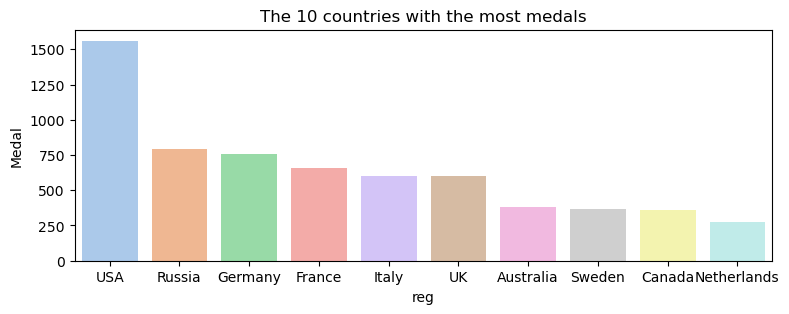

In [14]:
plt.figure(figsize=(9, 3))
sns.barplot(x='reg', y='Medal', data=med_df)
plt.title('The 10 countries with the most medals')
plt.xlabel('reg')
plt.ylabel('Medal')
plt.show()

In [15]:
events_summer_df = summer_olympics_df.groupby('Games')[['Sport']].nunique()
events_summer_df = events_summer_df.reset_index()
events_winter_df = winter_olympics_df.groupby('Games')[['Sport']].nunique()
events_winter_df = events_winter_df.reset_index()

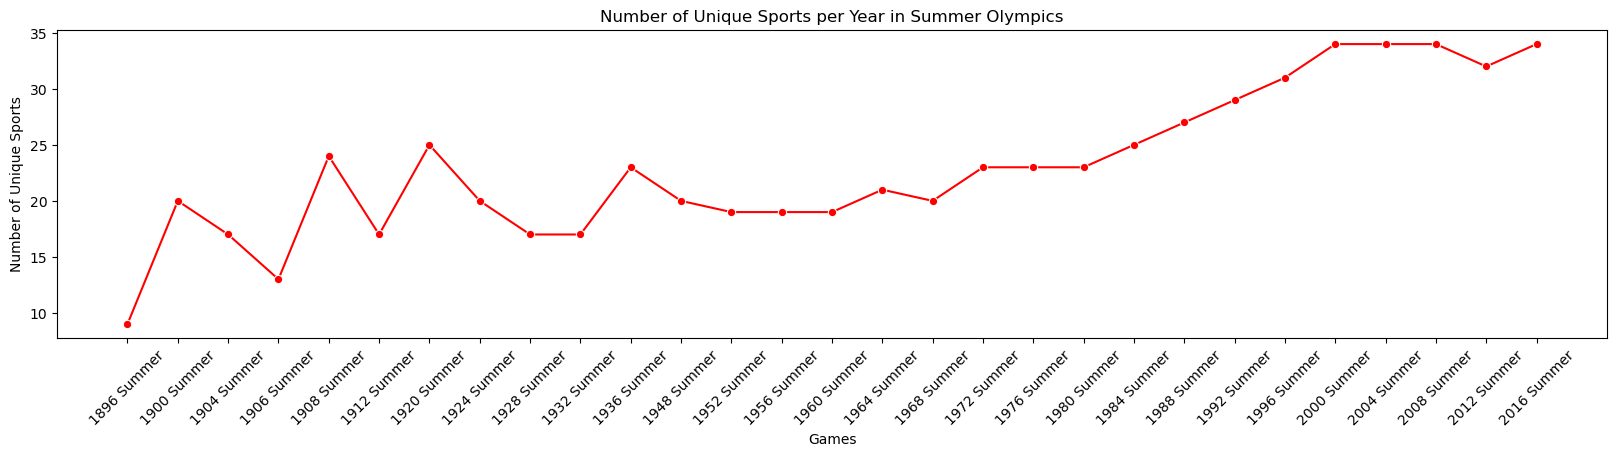

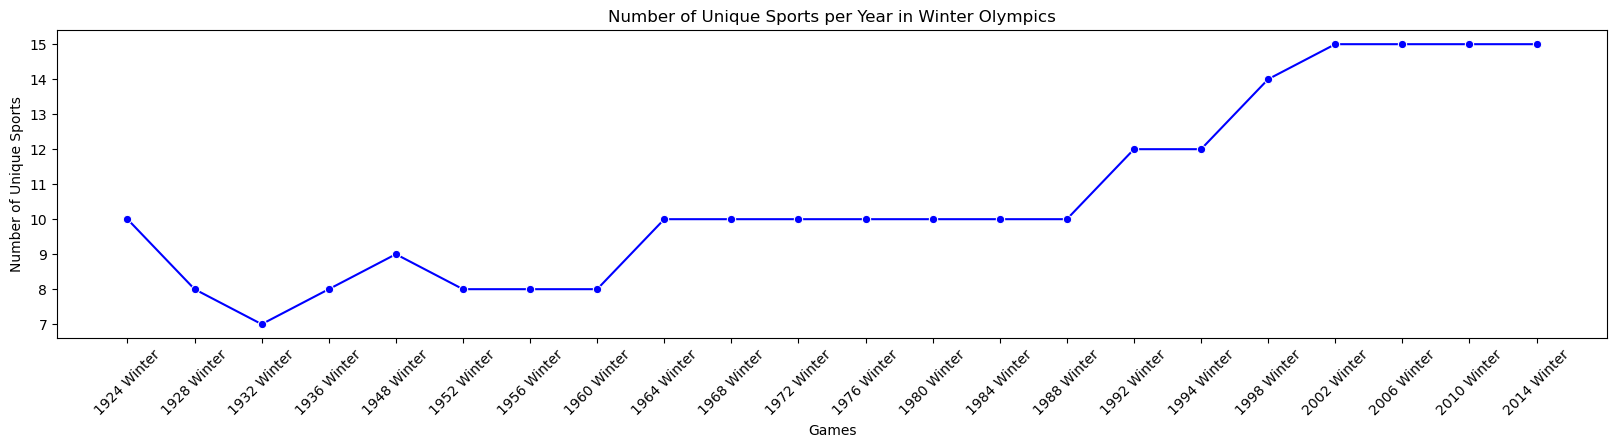

In [16]:
plt.figure(figsize=(20, 4))
sns.lineplot(data=events_summer_df, x='Games', y='Sport', marker='o', color='red')
plt.title('Number of Unique Sports per Year in Summer Olympics')
plt.xlabel('Games')
plt.ylabel('Number of Unique Sports')
plt.xticks(rotation=45)
# sns.despine()
plt.show()
plt.figure(figsize=(20, 4))
sns.lineplot(data=events_winter_df, x='Games', y='Sport', marker='o', color='blue')
plt.title('Number of Unique Sports per Year in Winter Olympics')
plt.xlabel('Games')
plt.ylabel('Number of Unique Sports')
plt.xticks(rotation=45)
# sns.despine()
plt.show()

In [17]:
top_ath_df = olympic_df.groupby('Name')[['Medal']].count() 
top_ath_df= top_ath_df.reset_index()
top_ath_df = top_ath_df.nlargest(10, 'Medal')
top_ath_df = top_ath_df.merge(olympic_df[['Name','NOC']], on='Name', how='left').drop_duplicates()
top_ath_df

Name  Medal  NOC
0       Nikolay Yefimovich Andrianov     15  URS
24               Ole Einar Bjrndalen     13  NOR
51            Birgit Fischer-Schmidt     12  GDR
55            Birgit Fischer-Schmidt     12  GER
64     Natalie Anne Coughlin (-Hall)     12  USA
76    Matthew Nicholas "Matt" Biondi     11  USA
88         Viktor Ivanovych Chukarin     11  URS
104           Vra slavsk (-Odloilov)     11  TCH
122  Aleksandr Nikolayevich Dityatin     10  URS
138                     Marit Bjrgen     10  NOR
157      Polina Hryhorivna Astakhova     10  URS

In [18]:
change_ath_df = olympic_df.groupby('Name')[['NOC']].nunique() 
change_ath_df= change_ath_df.reset_index()
change_ath_df = change_ath_df.nlargest(61, 'NOC')
change_ath_df = change_ath_df.rename(columns={'NOC': 'Number of shows'})
change_ath_df = change_ath_df.merge(olympic_df[['Name','NOC','summer_olympics_df','Year','Season']], on='Name', how='left').drop_duplicates()
change_ath_df

Name  Number of shows  NOC         reg  \
0                        Mamadou Diallo                4  MTN  Mauritania   
1                        Mamadou Diallo                4  GUI      Guinea   
2                        Mamadou Diallo                4  MLI        Mali   
3                        Mamadou Diallo                4  SEN     Senegal   
4            Andrey Pavlovich Bakhvalov                3  URS      Russia   
..                                  ...              ...  ...         ...   
285  Annemarie Josefina "Anna" Cox-Wood                2  AUS   Australia   
287  Annemarie Josefina "Anna" Cox-Wood                2  AUS   Australia   
288  Annemarie Josefina "Anna" Cox-Wood                2  AUS   Australia   
289     Apolinario "Polin" Belisle Gmez                2  BIZ      Belize   
290     Apolinario "Polin" Belisle Gmez                2  HON    Honduras   

     Year  Season  
0    1984  Summer  
1    1980  Summer  
2    2004  Summer  
3    1984  Summer  
4    1988  Winter  
..    ...     ...  
285  1992  Summer  
287  1996  Summer  
288  2000  Summer  
289  1988  Summer  
290  1992  Summer  

[179 rows x 6 columns]

In [42]:
male_df = summer_olympics_df[summer_olympics_df['Sex'] == 'M']
female_df = summer_olympics_df[summer_olympics_df['Sex'] == 'F']

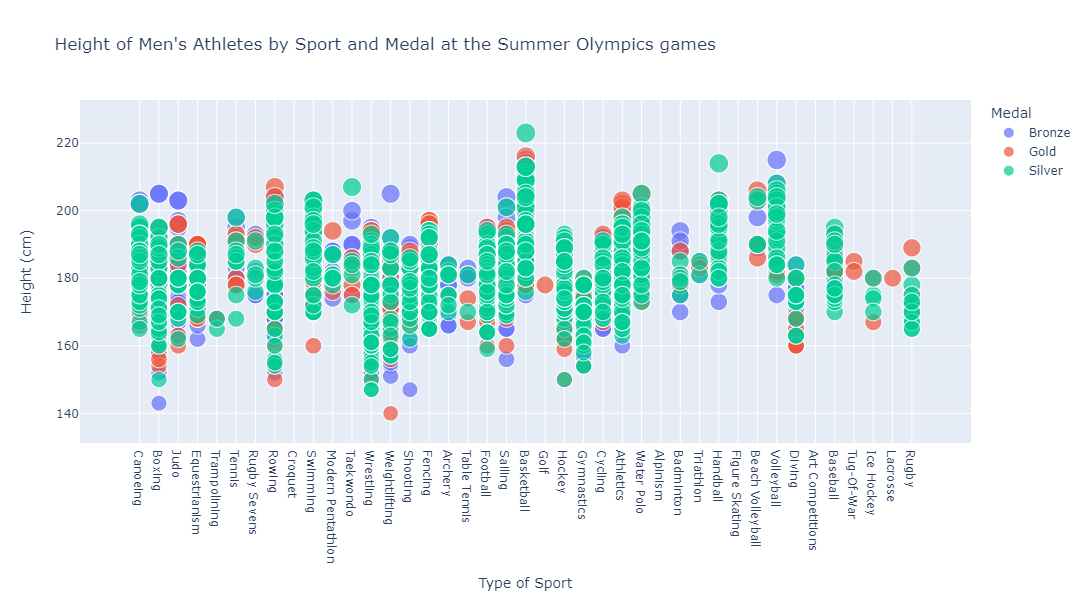

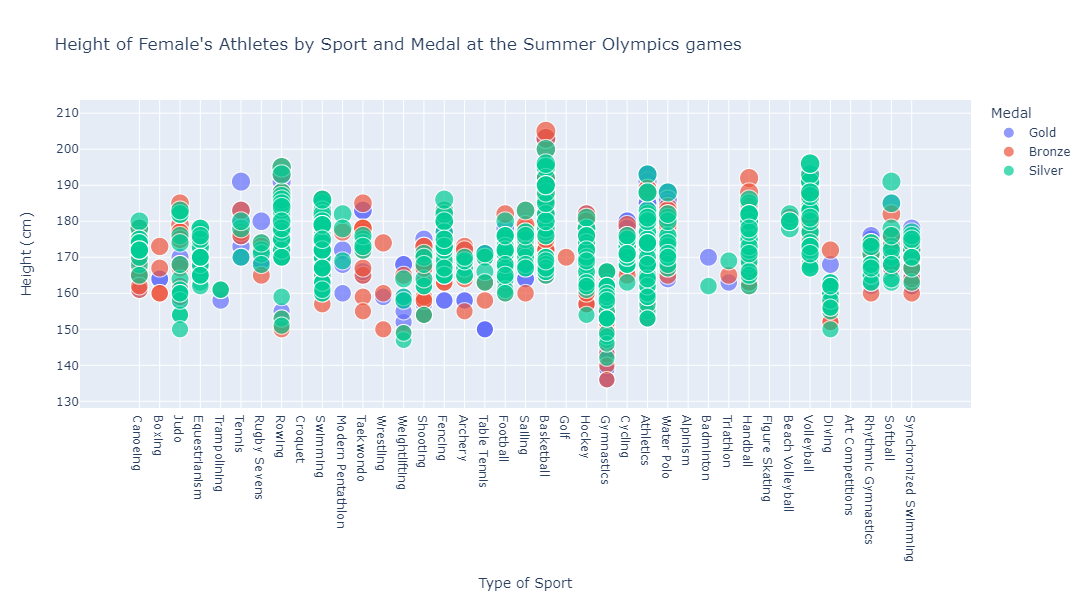

In [129]:
female_sports = female_df['Sport'].unique()
male_sports = male_df['Sport'].unique()
sport_order = list(set(female_sports) & set(male_sports))
female_df_cleaned = female_df.dropna(subset=['Height', 'Medal'])
male_df_cleaned = male_df.dropna(subset=['Height', 'Medal'])
fig1 = px.scatter(male_df_cleaned, 
                  x='Sport', 
                  y='Height', 
                  color='Medal',
                  size='Height',
                  hover_name='Sport',
                  title="Height of Men's Athletes by Sport and Medal at the Summer Olympics games",
                  category_orders={'Sport': sport_order},
                  labels={'Sport': 'Type of Sport', 'Height': 'Height (cm)', 'Medal': 'Medal'},
                  height=600)
fig2 = px.scatter(female_df_cleaned, 
                  x='Sport', 
                  y='Height', 
                  color='Medal',
                  size='Height',
                  hover_name='Sport',
                  title="Height of Female's Athletes by Sport and Medal at the Summer Olympics games",
                  category_orders={'Sport': sport_order},
                  labels={'Sport': 'Type of Sport', 'Height': 'Height (cm)', 'Medal': 'Medal'},
                  height=600)

fig1.show()
fig2.show()


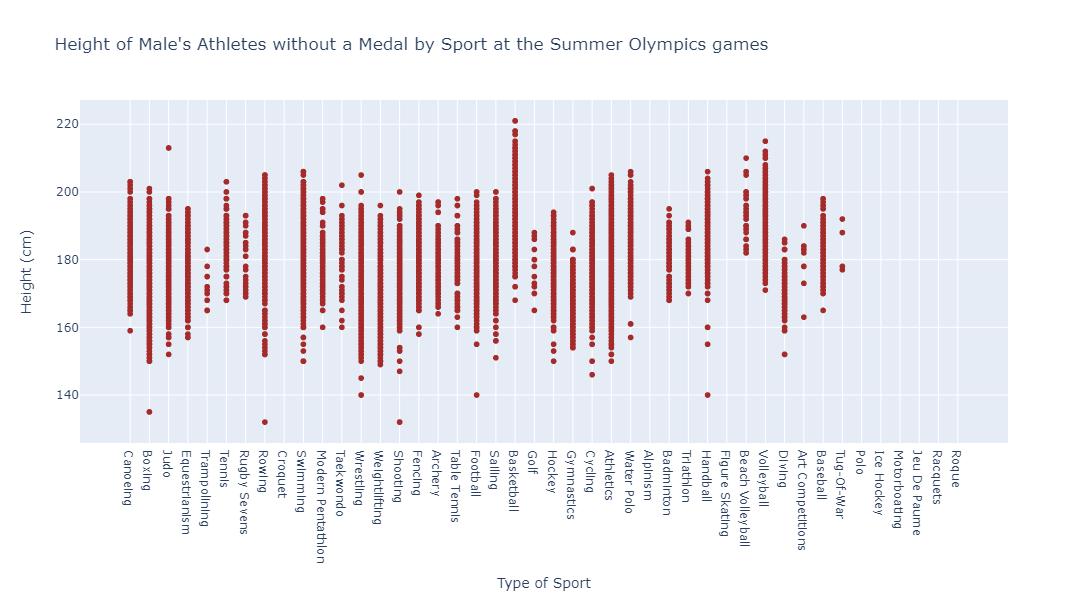

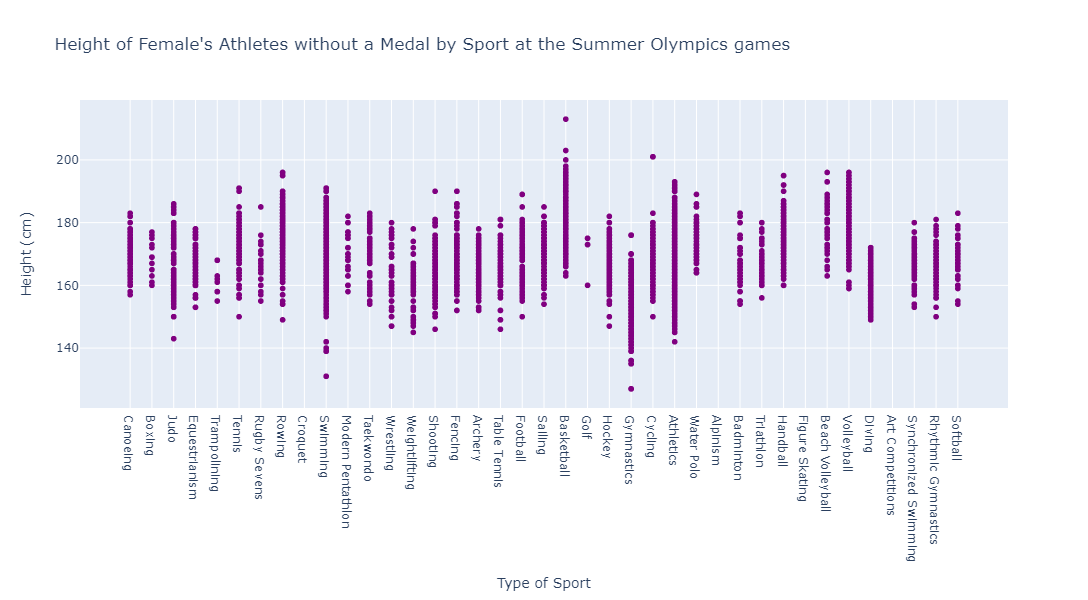

In [126]:
female_sports = female_df['Sport'].unique().tolist()
male_sports = male_df['Sport'].unique().tolist()
sport_order = list(set(female_sports) & set(male_sports))

no_medal_oly_m_df = male_df[pd.isna(male_df['Medal'])]
no_medal_oly_f_df = female_df[pd.isna(female_df['Medal'])]

fig1 = px.scatter(no_medal_oly_m_df, 
                  x='Sport', 
                  y='Height', 
                  color_discrete_sequence=['brown'], 
                  hover_name='Sport',
                  title="Height of Male's Athletes without a Medal by Sport at the Summer Olympics games",
                  labels={'Sport': 'Type of Sport', 'Height': 'Height (cm)', 'Medal': 'Medal'},
                  category_orders={"Sport": sport_order},  # סדר קטגוריות ספורט כפי שמוגדר בקוד
                  height=600)

fig2 = px.scatter(no_medal_oly_f_df, 
                  x='Sport', 
                  y='Height', 
                  color_discrete_sequence=['purple'], 
                  hover_name='Sport',
                  title="Height of Female's Athletes without a Medal by Sport at the Summer Olympics games",
                  labels={'Sport': 'Type of Sport', 'Height': 'Height (cm)', 'Medal': 'Medal'},
                  category_orders={"Sport": sport_order},  # סדר קטגוריות ספורט כפי שמוגדר בקוד
                  height=600)

fig1.show()
fig2.show()


In [ ]:
israel_df = olympic_df[olympic_df['reg'] == 'Israel']
israel_df.shape





In [ ]:
israel_df 
medal = israel_df.groupby('Sport')[['Medal']].count()
medal = medal.reset_index()
medal

In [ ]:
col_to_dummy = ['Medal']
dummy_olympic =  pd.get_dummies(age_m_df[col_to_dummy])

dummy_olympic

In [ ]:
# # הפיכת עמודת הספורט למשתנה דמי
# sport_dummy = pd.get_dummies(summer_olympics_df['Sport'])
# sport_dummy = ['Age', 'Height', 'Weight'] + list(sport_dummy.columns)
# # יצירת DataFrame עם עמודות המתאימות
# cols = ['Age', 'Height', 'Weight'] + list(sport_dummy.columns)
# data_for_corr = sport_dummy[cols]

# # חישוב טבלת קורלציה
# correlation_table = data_for_corr.corr()

# # הצגת הטבלה
# correlation_table
# הפיכת עמודת הספורט למשתנה דמי
# הפיכת עמודת הספורט למשתנה דמי
sport_dummy = pd.get_dummies(summer_olympics_df['Sport'])
sport_dummy_cols = list(sport_dummy.columns)

# יצירת DataFrame עם עמודות המתאימות
cols = ['Age', 'Height', 'Weight'] + sport_dummy_cols
data_for_corr = summer_olympics_df[cols]

correlation_matrix = sport_dummy.corr(numeric_only = False, method = 'spearman' ).round(2)
subset_correlation_matrix = correlation_matrix[cols].transpose()
subset_correlation_matrix


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = summer_olympics_df
data = le.fit_transform(data['Sport'])

# חישוב הקורלציה
correlation = data[['height', 'sport_encoded']].corr()

print(correlation)

In [ ]:
len(olympic_df['NOC'].unique())

In [ ]:
olympic_df['Medal'].unique()

In [ ]:
olympic_df.shape

In [ ]:
year_df = olympic_df.groupby('Year')
year_df

In [ ]:
tr = olympic_df[olympic_df['Year'] == 1896]
tr

In [ ]:
tr = olympic_df[olympic_df['Medal'] == 'Bronze']
len(tr)